# How to solve this task with cellular automata ?

In [1]:
from ca_utils import display_vid, plot_task, load_data

installing moviepy


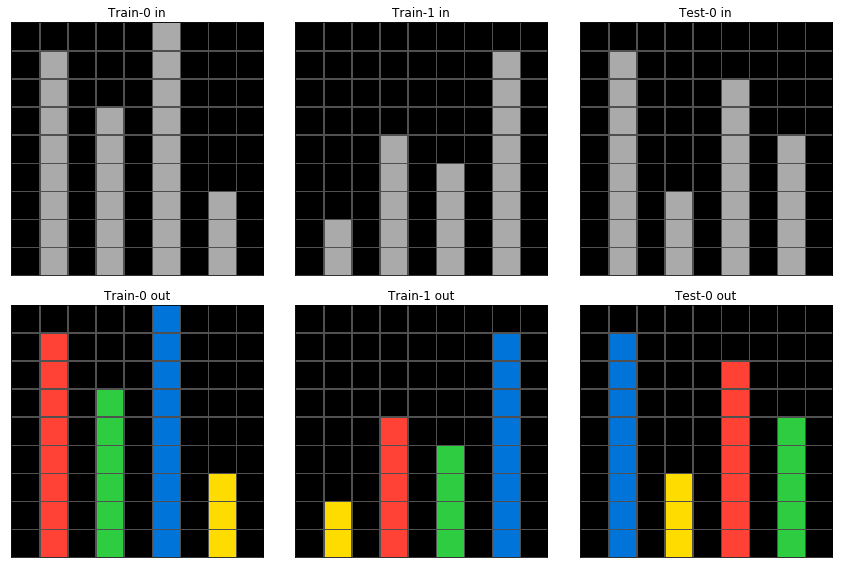

In [2]:
task = load_data('08ed6ac7.json', phase='training')
plot_task(task)

Here is a video of a cellular automata coloring the bars in order of their size. If you want to understand how this works read on ! 

In [3]:
from moviepy.editor import VideoFileClip

display_vid(VideoFileClip('../input/ca-videos/IaANIHh6.mp4'), loop=True, autoplay=True)

# 0. Introduction

First of all I want to thank the organizers of this  kaggle competition. This competition is quite unorthodox 
and I believe common methods, will fail to work. For me it is hard to think of a tool from the standard machine
learning toolbox that will be applicable "out of the box" to this challenge and this is quite exciting! 

Not every day you are challenged to create an algorithm capable of reasoning!

I believe this challenge could be solved and part of a successful solution are cellular automata, a somewhat niche area of mathematical science.
In this notebook I will try to explain how cellular automata (CA) could be used to tackle this challenge.


In  _part 1_ I will briefly describe what are CA, why people are interested in them and how form very few rules extremely complex systems emerge. Then 
in _part 2_ I will describe how CA are connected to this challenge. More precisely how CA could be 
used as a perfect medium for deriving reasoning rules. I will formally define what a CA is and in _part 3_ I will solve several tasks by implementing transition rules for the defined CA. In _part 4 and 5_ I will analyze the task solutions, find interesting patterns and argue how a successful solution to this challenge would look like.

I have also created a [thread](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131196) to share CA solutions to complex tasks, you are welocmed to participate !



# 1. What are Cellular Automata (CA)

[Wikipedia](https://en.wikipedia.org/wiki/Cellular_automaton) does a great job in describing what CA is:

> A **cellular automaton** consists of a regular grid of cells, each in one of a finite number of states [...], such as on and off. The grid can be in any finite number of dimensions. For each cell, a set of cells called its neighborhood is defined relative to the specified cell. An initial state (time t = 0) is selected by assigning a state for each cell. A new generation is created (advancing t by 1), according to some fixed rule [...] that determines the new state of each cell in terms of the current state of the cell and the states of the cells in its neighborhood. Typically, the rule for updating the state of cells is the same for each cell and does not change over time, and is applied to the whole grid simultaneously.

In other words CA is a collection of transition rules which specify how to update a set of numbers situated on a grid.

CA are interesting because quite complex behaviours emerge form rather simple rules. 
A great example of such emergence is the, [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) (GoL). 
In it's classical formulation GoL is implemented using an infinite grid with cells having two states - 0 dead, 1 alive.

There are four transition rules:

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation.
2. Any live cell with two or three live neighbours lives on to the next generation.
3. Any live cell with more than three live neighbours dies, as if by overpopulation.
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

These seemingly simple rules give rise to quite interesting phenomena.

- **[osicllators](https://en.wikipedia.org/wiki/Oscillator_(cellular_automaton%29)** - patterns which oscillate from one state to the other indefinitely.

<table>
    <tr>
        <th> Pulsar</th>
        <th> Kok's galaxy</th>
        <th> pentadecathlon </th>
    </tr>
    <tr>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/0/07/Game_of_life_pulsar.gif"></img></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Oscilador8periodos.gif"></img></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/I-Column.gif"></img> </td>
    </tr>
</table>

- **[spaseships](https://en.wikipedia.org/wiki/Spaceship_(cellular_automaton%29)** - patterns which move across the grid.

<table>
    <tr>
        <th> Glider</th>
        <th> Middle-weight spaceship </th>
        <th> Heavy-weight spaceship </th>
    </tr>
    <tr>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Game_of_life_animated_glider.gif"></img></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/Animated_Mwss.gif"></img></td>
        <td><img src="https://upload.wikimedia.org/wikipedia/commons/4/4f/Animated_Hwss.gif"></img></td>
    </tr>
</table>


More complex behaviors could be created: 

 - Patterns that are able to produce other patterns. For example guns which produce gliders.
 ![](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)
 - Patterns that interact with other patterns in a prefefined way. For example [reflectors](https://en.wikipedia.org/wiki/Reflector_(cellular_automaton%29) (the pink ones in the picture below) reflect gliders.
 ![](https://upload.wikimedia.org/wikipedia/commons/d/d0/Color_coded_racetrack_large_channel.gif)
 
 - Patters which take a large number of generations to stabilize. For example the [switch engine](https://www.conwaylife.com/wiki/Switch_engine) - a pattern composed of 8 cells stabilizes only after 3911 iterations becomes a pattern of 842 cells.
 <table>
    <tr>
        <th> Switch engine it=0</th>
        <th> Switch engine it=3911</th>
    </tr>
    <tr>       
        <td><img src="https://i.ibb.co/Ydg4nKS/Cropper-Screenshot-2020-02-17-12-20-34.png"></img></td>
        <td><img src="https://www.conwaylife.com/w/images/a/af/Switchengine_final.png"></img></td>
    </tr>
</table>
 
 
 
Patterns could be combined together in order to construct more complex patterns. For example the [Noas ark](https://www.conwaylife.com/wiki/Noah%27s_ark) spaceship is created by the combination of two switch engines. The most impressive construction which I have found is a whole [comuter](https://codegolf.stackexchange.com/questions/11880/build-a-working-game-of-tetris-in-conways-game-of-life). The system was designed to play tetris, but the tetris game is not hard coded. The the game is written in a higher level language and then compiled and loaded to the computer ROM. The computer architecture is shown in the picture below.

![](https://i.stack.imgur.com/JXmnf.png)


Again I want to emphasize - **all shown above emerge from a system based on only 4 rules!**

# 2. How are CA connected to this competition

As a reminder: in this competition you are given pairs of source-target training images. Your task is to infer the rule which will allow to transition from source image to the target and later apply such rule to an arbitrary number of images. The rules which you should infer are extremely diverse, for example in the first image shown below you should continue the 'stripe' to the right border while in the second you should output the voids formed by the red shapes.


![](https://i.ibb.co/h8bkyPV/task-1.png)

<img src="https://i.ibb.co/s5F3Fwz/task-0.png" alt="task-0" border="0">


I feel, a somewhat fundamental question should be answered - how such rules should be represented.

In the general case this is an [excitingly difficult problem](https://groups.csail.mit.edu/medg/ftp/psz/k-rep.html), but in case of this competition I think that one could try to exploit the cellular automata ability of creating complex behaviors form simple rules. And use them as a language which could be created by an algorithm in order to represent the challenge tasks rules. 

Before going further I will first define precisely what I mean by cellular automata and what I mean when I say 'language to represent rules'. Then I will illustrate 
how to apply CA to this challenge by solving three tasks.

## Formulation of CA 

We will use a life like cellular automata. 
Our CA will have two grids - and input and an output grid. The CA transition rules are applied to the input grid, the transition rules outputs are written to the output grid. Once the iteration is completed the output grid becomes the input grid. 

As input our transition rules take:
- the value of the `i,j` input cell
- a neighborhood around the `i, j`-th input the cell in the input grid
- flags denoting weather the current cell is near a border

As output the transition rules give:
- the value of the `i, j` cell in the output grid


The iterations of the CA are preformed while a stable state is not reached i.e. the input grid is equal tho the output grid. The stable state is expected to be the solution to the challenge.


CA transition rules are a great way to represent the rules you are expected to infer in this challenge. As you can notice they have a rather constrained input, and later I will show that they also make use of a rather constrained set of operations. This makes them a perfect candidate for being the "language for reason".


# 3. Solving problems with CA

First some utility functions 

In [4]:
from ca_utils import vis_automata_task
import numpy as np
from itertools import product

nbh = lambda x, i, j: { 
    (ip, jp) : x[i+ip, j+jp] 
        for ip, jp in product([1, -1, 0], repeat=2) 
            if 0 <= i+ip < x.shape[0] and 0 <= j+jp < x.shape[1]
}


### What nbh() does

The `nbh()` function will be used extensively in the following examples. `nbh()` is a helper function for working with neighborhoods of cells. 
The example below provides an illustration of what it does by taking neiborhood of the center cell of a 3x3 grid:


    grid = np.arange(9).reshape((3,3))
    # array([[0, 1, 2],
    #        [3, 4, 5],
    #        [6, 7, 8]])
    nbh(grid, 1, 1) # dict: nbh_id -> nbh_value
    #{
    #    (-1, -1): 0, (-1, 0): 1, (-1, 1): 2,
    #    ( 0, -1): 3, ( 0, 0): 4, ( 0, 1): 5,
    #    (1, -1): 6,  ( 1, 0): 7, (1, 1): 8,
    #}


   

### Color coding

Through this challenge in order to visualize the tasks color coding are adopted, here we show what color corresponds to what number. (code taken from [here](https://www.kaggle.com/nagiss/abstraction-and-reasoning-view-all-data))

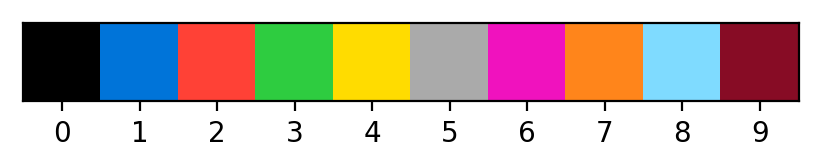

In [5]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

## Task training/db3e9e38, continue the pattern

Let's try to design a cellular automata for task `training/db3e9e38`. 
         
  

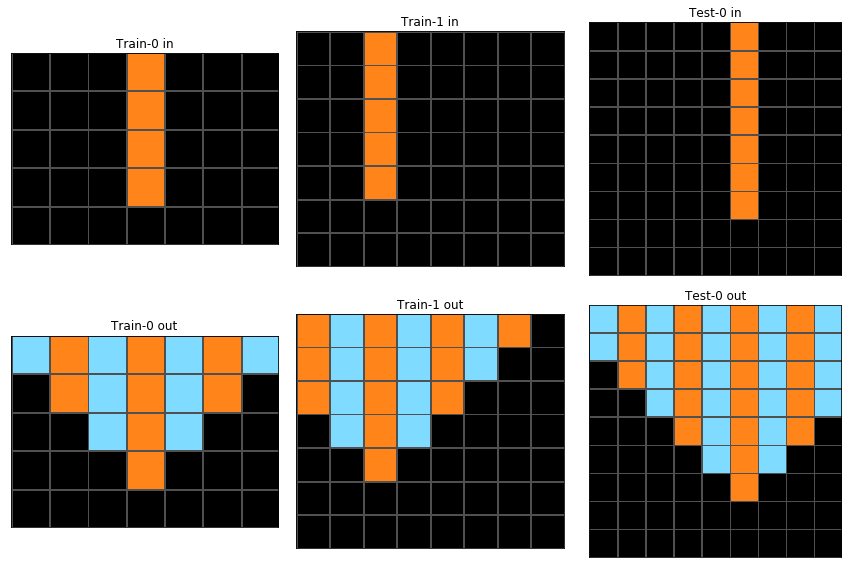

In [6]:
task = load_data('db3e9e38.json', phase='training')

plot_task(task)

Let's keep things simple and first write CA transition rules for repeating the pattern to the right.

    - R1: if the current call has a color -> do nothing
    - R2: if the current cell is black and as it's left neighbor and lower left neighbors are orange cells 
        -> output a light blue cell
    - R3: if the current cell is black and as it's left neighbor and lower left neighbors are light blue cells 
        -> output an orange cell 


We can visualize the neighborhood transition rules as:
    

    light blue  *   *
    light blue      *   -> orange
      *         *   * 
      
    orange  *   *
    orange      *   -> light blue
      *     *   *                 * - means  cell of any color


Let's try to implement it:

In [7]:

def compute_db3e9e38_part_automata_step(input, hidden_i):
    #
    # this function takes as input the input grid and outputs the output grid

    # input, is the input grid
    # ignore hidden_i for now
    
    # for convenience let's name the colors
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    # let's create the output grid
    output = np.zeros_like(input, dtype=int)
    
    # here we iterate over all the coordinates of cells in the input grid
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        # current cell and current neighborhood 
        i_c = input[i, j]                
        i_nbh = nbh(input, i, j)
        
        # Here our transition rule starts 
        # R1: if the current call has color
        if i_c != blk:
            output[i, j] = i_c # leave it there 
            
        # R2: if the current cell is black and as it's left neighbor and lower left neighbors are orange cells 
        elif i_c == blk and i_nbh.get((0, -1)) == orn and i_nbh.get((1, -1)) == orn:
            output[i, j] = azu # paint it in light blue (azure)
        
        # R3: if the current cell is black and as it's left neighbor and lower left neighbors are light blue cells  
        elif i_c == blk and i_nbh.get((0, -1)) == azu and i_nbh.get((1, -1)) == azu:
            output[i, j] = orn # paint it in orange
        
    return output, hidden_i
            
vis_automata_task(task, compute_db3e9e38_part_automata_step, 16, 0)

So, with only three rules we nearly solved the task, let's add symmetrical variants of the previous rules.

In [8]:
def compute_db3e9e38_automata_step(input, hidden_i):
    # ignore hidden_i for now
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    output = np.zeros_like(input, dtype=int)
    
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        i_c = input[i, j]                
        i_nbh = nbh(input, i, j)
        
        # R1
        if i_c != blk:
            output[i, j] = i_c
            
        # R2 and it's symmetrical variant
        if i_c == blk and i_nbh.get((0, 1)) == orn and i_nbh.get((1, 1)) == orn:
            output[i, j] = azu
        elif i_c == blk and i_nbh.get((0, -1)) == orn and i_nbh.get((1, -1)) == orn:
            output[i, j] = azu
        
        # R3 and it's symmetrical variant
        elif i_nbh.get((0, 1)) == azu and i_nbh.get((1, 1)) == azu:
            output[i, j] = orn
        elif i_nbh.get((0, -1)) == azu and i_nbh.get((1, -1)) == azu:
            output[i, j] = orn
        
    return output, hidden_i
            
        

vis_automata_task(task, compute_db3e9e38_automata_step, 16, 0)

Solved with only 5 transition rules ! 
Let's do another one!

## Task training/b27ca6d3, circle two red cells

This task is a little bit harder: we need to circle with green cells all the consecutive pairs of red cells. By consecutive cells I mean cells which share a common edge.

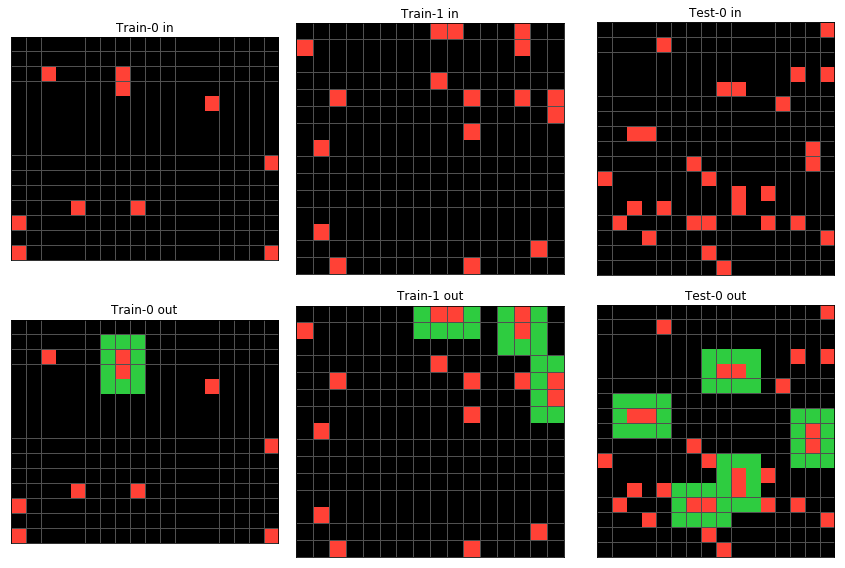

In [9]:
task = load_data('b27ca6d3.json', phase='training')

plot_task(task)

Let's sketch the rules and implement them, for now we will ignore the cells near the borders:

      - R0 if not black -> do nothing
      - R1 if the neighborhood contains two consecutive red cells 
          -> color the cell with green
      - R2 if the neighborhood contains three consecutive cells colored green, red, green 
          -> color the cell with green
      - R3 if the neighborhood contains three consecutive cells colored green, red, green arranged in a corner
          -> color the cell with green
       

In [10]:
def compute_b27ca6d3_part3_automata_step(input, hidden_i):
    # ignore hidden_i for now
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    output = np.zeros_like(input, dtype=int)
    
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        i_c = input[i, j]       
        i_nbh = nbh(input, i, j)
        
        is_top_b, is_bottom_b = i == 0, i == input.shape[0]-1
        is_left_b, is_right_b = j == 0, j == input.shape[1]-1
        is_b = is_top_b or is_bottom_b or is_left_b or is_right_b
        
        # clock wise orderd neighboring elements
        cw_nbh_ixs = [ (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]

        # consecutive cell pairs
        pair_ixs = list(zip(cw_nbh_ixs[:-1], cw_nbh_ixs[1:])) + [(cw_nbh_ixs[-1],cw_nbh_ixs[0])]
                    
        # sides of the rectangle formed by the neighboring cells
        side_ixs = [ 
            cw_nbh_ixs[:3], # top
            cw_nbh_ixs[2:5], # left
            cw_nbh_ixs[4:7], # bottom 
            cw_nbh_ixs[6:] + cw_nbh_ixs[:1] # right
        ]        
        
        # tests if all the cells are non border ones
        all_present = lambda s1, c, s2: all(x in i_nbh for x in [s1, c, s2])
        # tests if the three cells are colored green, red, green
        test_side = lambda s1, c, s2: (i_nbh.get(s1, grn),i_nbh.get(c, red),i_nbh.get(s2, grn)) == (grn, red, grn)
        
        # corners of the square formed by the neighboring pixels
        corner_ixs = [ 
            cw_nbh_ixs[1:4], # top right
            cw_nbh_ixs[3:6], # bottom right
            cw_nbh_ixs[5:8], # bottom left
            cw_nbh_ixs[7:] + cw_nbh_ixs[:2] # top left
        ]
        
        # R0 if cell has color 
        if i_c != blk:
            output[i, j] = i_c # do nothing 
               
        # R1: if the neighborhood contains two consecutive red cells 
        elif any(i_nbh.get(ix1) == red and i_nbh.get(ix2) == red for ix1, ix2 in pair_ixs):
            output[i, j] = grn   # color in green
            
        # R2: if the neighborhood contains three consecutive cells colored with green red green 
        elif any( test_side(s1, c, s2) for s1, c, s2 in side_ixs if all_present( s1, c, s2)):
            output[i, j] = grn # color in green 
        
        # R3: if the neighborhood contains three consecutive cells colored with green red green arranged in a corner
        elif  any( test_side(s1, c, s2) for s1, c, s2 in corner_ixs if all_present(s1, c, s2)):
            output[i, j] = grn 
        
        
    return output, hidden_i

vis_automata_task(task, compute_b27ca6d3_part3_automata_step, 5, 0)

Now we just need to deal with the corner case - when cells are near a border. Let's add a rule for that. 

      - R1 if the neighborhood contains two consecutive red cells 
          -> color the cell with green
      - R2 if the neighborhood contains three consecutive cells colored with green red green arranged in straight line corner
          -> color the cell with green
      - R3 if the neighborhood contains three consecutive cells colored with green red green arranged in a corner
          -> color the cell with green
      - R4 if we are near a border and one green and one red consecutive cells are present
          -> color the cell with green

The code stays the same, we just define a helper function and add `R4` to the end of the if block.
```python

# ....

# tests if the center cell is present with least one cell present on the side
some_present = lambda s1, c, s2: c in i_nbh and (s1 in i_nbh or s2 in i_nbh)

# ...

# R4: if we are near a border and one green and one red consecutive cells are present
elif i_c == blk and is_b and any( test_side(s1, c, s2) 
                                     for s1, c, s2 in side_ixs 
                                         if some_present( s1, c, s2) ):
    output[i, j] = grn 

```

In [11]:
def compute_b27ca6d3_automata_step(input, hidden_i):
    
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    output = np.zeros_like(input, dtype=int)
    
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        i_c = input[i, j]       
        i_nbh = nbh(input, i, j)
        
        is_top_b, is_bottom_b = i == 0, i == input.shape[0]-1
        is_left_b, is_right_b = j == 0, j == input.shape[1]-1
        is_b = is_top_b or is_bottom_b or is_left_b or is_right_b
        
        # clock wise orderd neiborhood elements
        cw_nbh_ixs = [ (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]

        # consecutive cell pairs
        pair_ixs = list(zip(cw_nbh_ixs[:-1], cw_nbh_ixs[1:])) + [(cw_nbh_ixs[-1],cw_nbh_ixs[0])]
                    
        # sides of the rectangle formed by the neighboring cells
        side_ixs = [ 
            cw_nbh_ixs[:3], # top
            cw_nbh_ixs[2:5], # left
            cw_nbh_ixs[4:7], # bottom 
            cw_nbh_ixs[6:] + cw_nbh_ixs[:1] # right
        ]        
        
        # tests if all the cells are non border ones
        all_present = lambda s1, c, s2: all(x in i_nbh for x in [s1, c, s2])
        # tests if the three cells are colored green, red, green
        test_side = lambda s1, c, s2: (i_nbh.get(s1, grn),i_nbh.get(c, red),i_nbh.get(s2, grn)) == (grn, red, grn)
        # tests if the center cell is present and at least one on the side
        some_present = lambda s1, c, s2: c in i_nbh and (s1 in i_nbh or s2 in i_nbh)
        
        # corners of the square formed by the neighboring pixels
        corner_ixs = [ 
            cw_nbh_ixs[1:4], # top right
            cw_nbh_ixs[3:6], # bottom right
            cw_nbh_ixs[5:8], # bottom left
            cw_nbh_ixs[7:] + cw_nbh_ixs[:2] # top left
        ]
        
        
        # R0 if cell has color 
        if i_c != blk:
            output[i, j] = i_c # do nothing 
        # R1: if the neighborhood contains two consecutive red cells 
        elif any(i_nbh.get(ix1) == red and i_nbh.get(ix2) == red for ix1, ix2 in pair_ixs):
            output[i, j] = grn   # color in green

        # R2: if the neighborhood contains three consecutive cells colored with green red green 
        elif i_c == blk and any( test_side(s1, c, s2) for s1, c, s2 in side_ixs if all_present( s1, c, s2)):
            output[i, j] = grn # color in green 
            
        # R3: if the neighborhood contains three consecutive cells colored with green red green arranged in a corner
        elif i_c == blk and any( test_side(s1, c, s2) for s1, c, s2 in corner_ixs if all_present(s1, c, s2)):
            output[i, j] = grn 
            
        # R4+: if we are near a border and one green and one red consecutive cells are present
        elif i_c == blk and is_b and any( test_side(s1, c, s2) for s1, c, s2 in side_ixs if some_present( s1, c, s2) ):
            output[i, j] = grn 
        
        
    return output, hidden_i

vis_automata_task(task, compute_b27ca6d3_automata_step, 5, 0)

Again, we were able to solve this problem by only formulating 5 transition rules.

## Task training/00d62c1b, fill with yellow the closed areas

This task is a little bit harder: we need to color with yellow the closed areas created by green cells.

By using our CA we can easily write transition rules that will fill all the closed areas with yellow - 
we just create yellow cells in places of high concentration of green cells `R1`. And make the yellow cells 
propagate into the voids, by turning black cells in yellow if at least one direct neighbor is yellow `R2`. By direct 
neighbor I mean a neighbor cell which shares an edge with the center cell.

Next, note that *if a yellow cell touches a border then we are sure the yellow cell is not in a closed area*. 
We could safety remove the yellow cells touching borders and all the ones that could be reached from the border-touching cell.

In order to do so we will "set fire" to the cells that touch borders - if a yellow cell appears near a border - color it in red `R3`. 
In order to remove all the cells that could be reached from the border-touching cell let's add two more transition rules. One that will color in red all 
yellow cells touching red ones `R4` and one that will color red cells in black `R5`. So the red cells can only last one iteration.

Let's implement this !



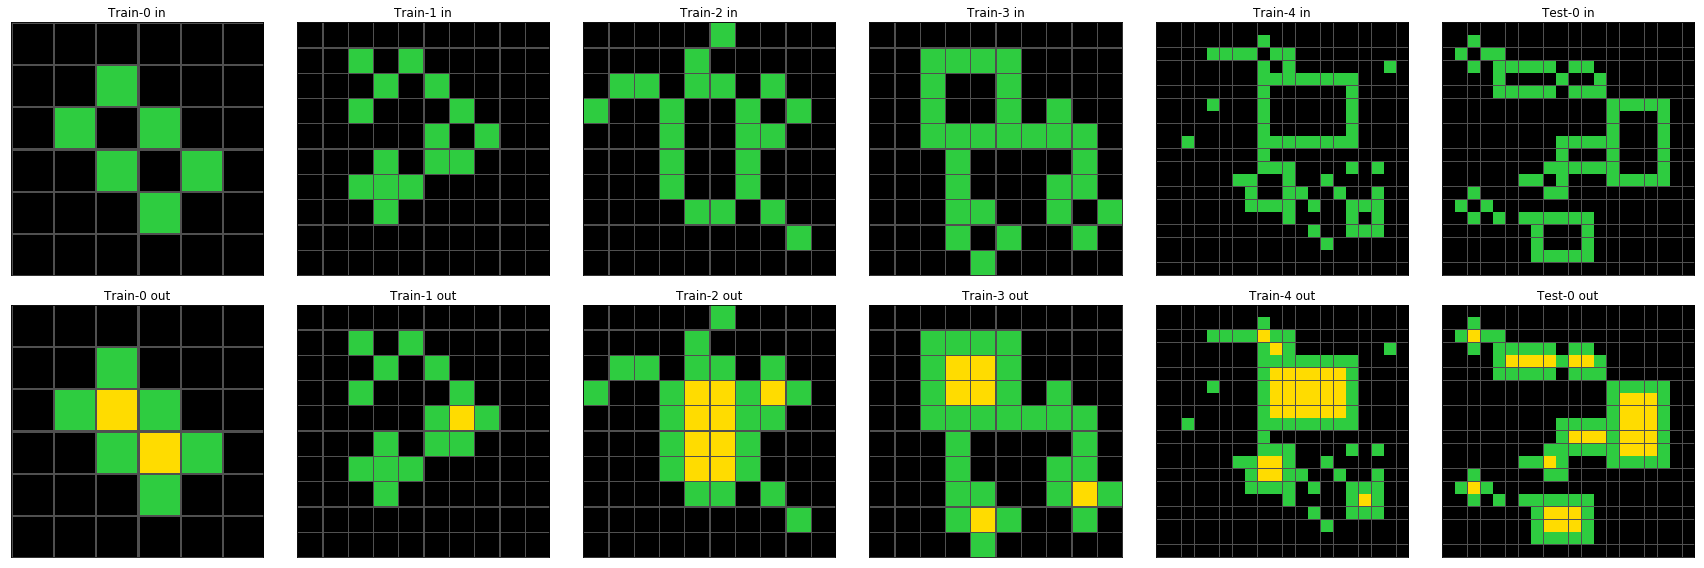

In [12]:
task = load_data('00d62c1b.json', phase='training')

plot_task(task)

In [13]:

def compute_00d62c1b_part_automata_step(input, hidden_i):
    
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    output = np.zeros_like(input, dtype=int)
    
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        i_c = input[i, j]
        i_nbh = nbh(input, i, j)        
        # direct neighbors to the current cell
        i_direct_nbh = { k: v for k, v in i_nbh.items() if k in {(1, 0), (-1, 0), (0, 1), (0, -1)} }
        
        is_top_b, is_bottom_b = i == 0, i == input.shape[0]-1
        is_left_b, is_right_b = j == 0, j == input.shape[1]-1
        is_b = is_top_b or is_bottom_b or is_left_b or is_right_b
        
        
        if i_c == grn:
            output[i, j] = grn        
        # R1: create yellow cells where a lot of green cells are
        elif sum(1 for v in i_nbh.values() if v == grn) >= 4 and red not in i_direct_nbh.values():
            output[i, j] = ylw
            
        # R3: set fire to cells near the border
        elif i_c == blk and is_b and ylw in i_direct_nbh.values():
            output[i, j] = red
        # R4: make the fire spread - color in red all yellow cells touching red ones
        elif i_c == ylw and red in i_nbh.values():
            output[i, j] = red
        
        # R2: propagate yellow cells in the empty places
        elif i_c == blk and ylw in i_direct_nbh.values():
            output[i, j] = ylw
        # R5: make the 'fire burn'
        elif i_c == red and red in i_nbh.values() or ylw not in i_direct_nbh.values():
            output[i, j] = blk
        else:
            #  R0
            output[i, j] = i_c
        
    return output, hidden_i

task = load_data('00d62c1b.json', phase='training')

vis_automata_task(task, compute_00d62c1b_part_automata_step, 128, 0)

Well, an interesting phenomena occurs - the fire does not stop! 

Lets find out what is happening. 

If you look at each frame one-by-one you may notice the following sequence of events:
  1. yellow cells are created
  2. the yellow cells propagate, encounter a border and turn to red cells
  3. after 'burning down' the yellow cells leave empty space
  4. `goto 1`

We have a problem - an infinite loop. 

The solution to this problem is quite simple -  before creating a yellow cell we should check if previously a red cell was there. In order to do so we shall add a memory which could take notice of what cells were red. 

In order to have a memory we will expand our CA to have hidden cells. Hidden cells are part of a grid staked atop of the input grid. The hidden grid is not displayed and it's state is not taken into account when checking the solution for correctness. 

Let's formlize the new CA definition.



### New CA formulation

Now as input our transition rules take:

- the value of the `i,j` input cell
- a neighborhood around the `i, j`-th input the cell in the input grid
- the value of th `i,j` hidden cell 
- a neighborhood around the `i, j`-th hidden the cell in the hidden grid
- flags denoting weather the current cell is near a border

As output the rules give:
- the value of the `i, j` cell in the output grid
- the value of the `i, j` hidden cell in the hidden grid


So now when 'setting fire' - turning a yellow cell to a red cell we will set a mark in the memory that will allow us to record if a red cell was ever present at that position. And when creating a yellow cell we will check the memory to record if a red cell was ever present in that position. 

The hidden grid is displayed in the visualization as the rightmost image.



In [14]:

def compute_00d62c1b_automata_step(input, hidden_i):
    
    blk, blu, red, grn, ylw, gry, pur, orn, azu, brw = range(10)
    
    output = np.zeros_like(input, dtype=int)
    hidden_o = np.zeros_like(hidden_i, dtype=int)
    
    for i, j in product(range(input.shape[0]), range(input.shape[1])):
        i_c = input[i, j]
        i_nbh = nbh(input, i, j)        
        # cells adagent to the current one 
        i_direct_nbh = { k: v for k, v in i_nbh.items() if k in {(1, 0), (-1, 0), (0, 1), (0, -1)} }
        
        i_h0 = hidden_i[0, i, j]
        
        is_top_b, is_bottom_b = i == 0, i == input.shape[0]-1
        is_left_b, is_right_b = j == 0, j == input.shape[1]-1
        is_b = is_top_b or is_bottom_b or is_left_b or is_right_b
        
        if i_h0 != blk:
            hidden_o[0, i, j] = i_h0
        
        if i_c == grn:
            output[i, j] = grn        
        
        # R1*: create yellow cells where a lot of green cells are
        elif sum(1 for v in i_nbh.values() if v == grn) >= 4 and red not in i_direct_nbh.values() and hidden_i[0, i, j] == 0:
            output[i, j] = ylw
        
            
        # R3*: set fite to cells near the border
        elif i_c == blk and is_b and ylw in i_direct_nbh.values():
            output[i, j] = red
            hidden_o[0, i, j] = 1
        # R4*: make the fire spread - color in red all yellow cells touching red ones
        elif i_c == ylw and red in i_nbh.values():
            output[i, j] = red
            hidden_o[0, i, j] = 1
        
        # R2: propagate yellow cells in the empty places
        elif i_c == blk and ylw in i_direct_nbh.values():
            output[i, j] = ylw
        
        elif i_c == red and red in i_nbh.values() or ylw not in i_direct_nbh.values():
            output[i, j] = blk
        else:
            output[i, j] = i_c
        
    return output, hidden_o

task = load_data('00d62c1b.json', phase='training')

vis_automata_task(task, compute_00d62c1b_automata_step, 50, 1)

And voila! The stable state is the solution and only 5 rules, again !

# 4. Analysis of transition rules

Let' take a closer look at the transition rules - although there is quite a lot of python, they actually perform a rather limited set of actions.

Namely, they only:
- compare the value of the current cell to a predefined value        
- compare the value of a neighborhood cell to a predefined value        
- check if the current cell is near the border 
- count the number of occurrences of a specific value in the neighborhood cells (Checking  the presence or absence of a specific value in the neighborhood cells could be thought as a subset of this action.)
    
Also they use simple logical `and`, `or` to combine the tests on the input grid. 

Note that the rules for all three tasks are written in one big `if`-statement (the last task uses two ifs to handle the hidden grid).
So we can see that all the test preformed on one grid are mutually exclusive.



# 5. A probable solution approach

The goal of previous analysis was to show how little is needed to write a solution by using CA transition rules. 
This is important, because if the task of this challenge is to develop an algorithm which will be able derive 
rules form few examples, then the language in which the rules are derived should permit to express complex 
behaviors with as little as possible. 

So, a probable solution approach is to create an algorithm which will generate transition rules 
for CAs which in their turn will solve the given tasks.


## Solving challenging tasks


Obviously some extension to the current CA formulation are required, for example the current formulation 
does not handle "zoom in" and "zoom out" tasks where the size of the input and output grids does not match.

Some tasks require general reasoning, like comparing sizes of object and their relative position, some 
require finding non trivial patterns. I think it would be interesting to try to implement as many hard 
tasks as possible with the current formulation of CA in order to find failures in the current formulation.
To do this I created a discussion [thread](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131196), fell free to participate.

Currently I have completed a solution for task `training/08ed6ac7`, the one shown in the begining. In `training/08ed6ac7` 
you are expected to color the bars according to their size. I plan to write a kernel explaining the solution the until 
the end of this week.


## Other approaches 

A good question to ask: is the current CA definition the optimal choice ?
    
There are different ways to define CA for example - in [second order](https://en.wikipedia.org/wiki/Second-order_cellular_automaton) cellular automata the state of a cell is determined by the cell neighborhood at the two previous time steps, in [block automation](https://en.wikipedia.org/wiki/Block_cellular_automaton) a regular lattice is shifted across the grid and the transition rules are applied to the cells in each lattice cell. It is possible to use neural netowrks to create transition rules, like in [neural GPU](https://arxiv.org/pdf/1511.08228.pdf) or this Alexander Mordvintsev [disitll article](https://distill.pub/2020/growing-ca/). 

Well maybe CA is not part of the best solution at all ! 
It will be great to explore possible approaches to solving this problem.

If you want to further discuss CA you are welcome to do so in the comment section to this post or this [topic](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131195).

# References    
    
More about CA:
- https://www.wolframscience.com/nks/ : A new kind of science, a well know book by Steven Wolfram about CA
- https://web.archive.org/web/20170706093620/https://www.irif.fr/~yunes/ca/archives/bookvivien.pdf : A more formal book about CA

CA & neural networks:
- https://arxiv.org/pdf/1511.08228.pdf : neural GPU
- https://distill.pub/2020/growing-ca/ : disitll article about neural network parametrized CA rules

More about GoL:
- https://www.conwaylife.com/wiki/ConwayLife.com : a great wiki
- https://copy.sh/life/ : an online Gol interpreter
- https://codegolf.stackexchange.com/questions/11880/build-a-working-game-of-tetris-in-conways-game-of-life : a computer implemented in Gol

Knowledge Representation:
- https://groups.csail.mit.edu/medg/ftp/psz/k-rep.html : an article by Randall Davis et al. which explores what knowledge representation is
    
   